 <h2>  MovieLens Data Analysis </h2>

The MovieLens dataset contains over 20 million movie ratings and tagging activities from 1995 to 2015, collected by GroupLens. The dataset is available from [MovieLens](https://www.kaggle.com/datasets/grouplens/movielens-20m-dataset), and includes 6 files and 19 columns providing information about the dataset. The dataset is widely used in research and presents an opportunity to create recommendation systems and data analysis. The project will involve several stages, including preprocessing, exploratory analysis, and data visualizations to derive meaningful insights for the user.



**1.1 Loading MovieLens Dataset**

In [2]:
# Import required packages
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Use glob to find pathname in the directory
paths = glob.glob(f'raw_data/*.csv')

# Loop through the data and print shape of the files
for path in paths:
    data = pd.read_csv(path)
    print(f'Shape of {path}:', data.shape)

Shape of raw_data/rating.csv: (20000263, 4)
Shape of raw_data/tag.csv: (465564, 4)
Shape of raw_data/genome_scores.csv: (11709768, 3)
Shape of raw_data/genome_tags.csv: (1128, 2)
Shape of raw_data/link.csv: (27278, 3)
Shape of raw_data/movie.csv: (27278, 3)


In [4]:
# Load movies dataset
path = 'raw_data/movie.csv'
movie = pd.read_csv(path)
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
# Load ratings dataset
path = 'raw_data/rating.csv'
rating = pd.read_csv(path)
rating.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [6]:
# Load tags dataset
path = 'raw_data/tag.csv'
tag = pd.read_csv(path)
tag.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18


In [7]:
# Load links dataset
path = 'raw_data/link.csv'
link = pd.read_csv(path)
link.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [8]:
# Load genome scores dataset
path = 'raw_data/genome_scores.csv'
score = pd.read_csv(path)
score.head()

,movieId,tagId,relevance
0,1,1,0.02500
1,1,2,0.02500
2,1,3,0.05775
3,1,4,0.09675
4,1,5,0.14675


In [9]:
# Load genome tags dataset
path = 'raw_data/genome_tags.csv'
gtags = pd.read_csv(path)
gtags.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


1.2 Filtering and Data Wrangling

In [10]:
# Extract year from title and add new column
movie['year'] = movie['title'].str.extract(r'\((\d{4})\)', expand=False)
movie['title'] = movie['title'].str.replace(r'\s*\(\d{4}\)', '', regex=True)
movie.head()

,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II,Comedy,1995


In [11]:
# Convert tags to lowercase
tag['tag'] = tag['tag'].str.lower()
tag.head()

,userId,movieId,tag,timestamp
0,18,4141,mark waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18


In [12]:
# Find null values in movie file
movie.isnull().sum()

movieId     0
title       0
genres      0
year       22
dtype: int64

In [13]:
# Find null values in rating file
rating.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [14]:
# Find null values in tag file
tag.isnull().sum() 

userId        0
movieId       0
tag          16
timestamp     0
dtype: int64

In [15]:
# Find null values in link file
link.isnull().sum() 

movieId      0
imdbId       0
tmdbId     252
dtype: int64

In [16]:
# Drop fields with null values
movie.dropna(inplace=True)
link.dropna(inplace=True)
tag.dropna(inplace=True)

**2.1: Most Popular Movies Based on Ratings**

In [17]:
# List the top ten movies based on ratings
movie_rating = pd.merge(movie, rating, on='movieId')
movie_title = movie_rating['title'].value_counts().head(10)
movie_title

title
Pulp Fiction                          67310
Forrest Gump                          66172
Shawshank Redemption, The             63366
Silence of the Lambs, The             63299
Jurassic Park                         59715
Star Wars: Episode IV - A New Hope    54502
Braveheart                            53769
Terminator 2: Judgment Day            52244
Matrix, The                           51334
Schindler's List                      50054
Name: count, dtype: int64

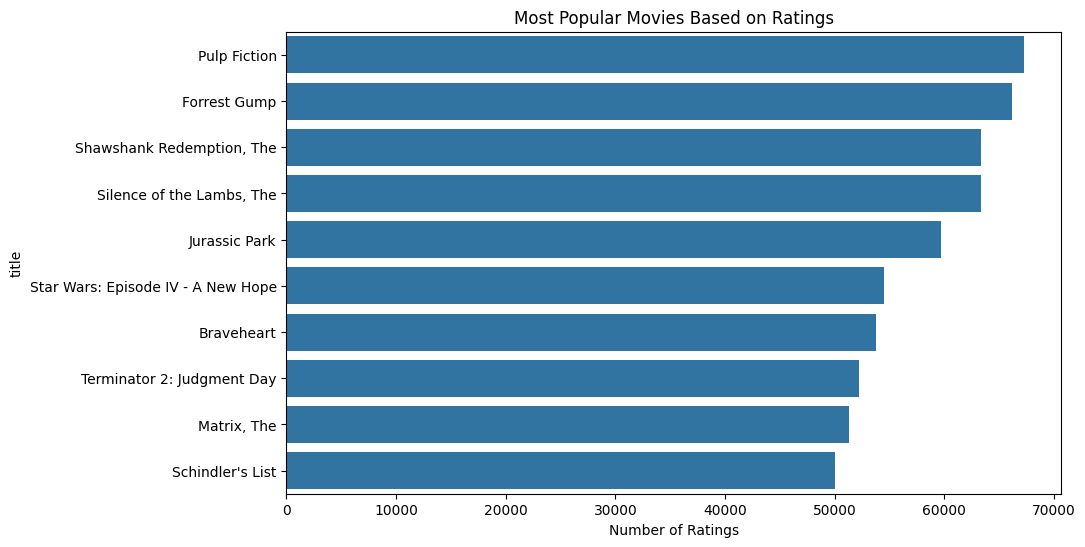

In [18]:
# Create an horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=movie_title.values, y=movie_title.index)
plt.xlabel('Number of Ratings')
plt.title('Most Popular Movies Based on Ratings')
plt.show()

**2.2: Most Popular Genres Based on Ratings**

In [19]:
# Split the movie genre tags into sessions
filter_data = movie.assign(genre=movie['genres'].str.split('|')).explode('genre')

# Merge the movie genres and rating
genre_name = pd.merge(filter_data, rating, on='movieId')

# Caculate the average rating for each genre
genre_rating = genre_name.groupby('genre').agg({'rating': ['mean', 'count']}).reset_index()
genre_rating.columns = ['genre', 'avg_rating', 'total_rating']

# Sort by the average rating
genre_rating = genre_rating.sort_values('avg_rating', ascending=False)
genre_rating.head(10)

,genre,avg_rating,total_rating
10,Film-Noir,3.965381,216689
18,War,3.809531,1048618
7,Documentary,3.739719,244611
6,Crime,3.674528,3298334
8,Drama,3.674296,8857839
14,Mystery,3.663509,1557280
12,IMAX,3.655946,492366
3,Animation,3.617494,1140476
19,Western,3.570498,423714
13,Musical,3.558090,870914


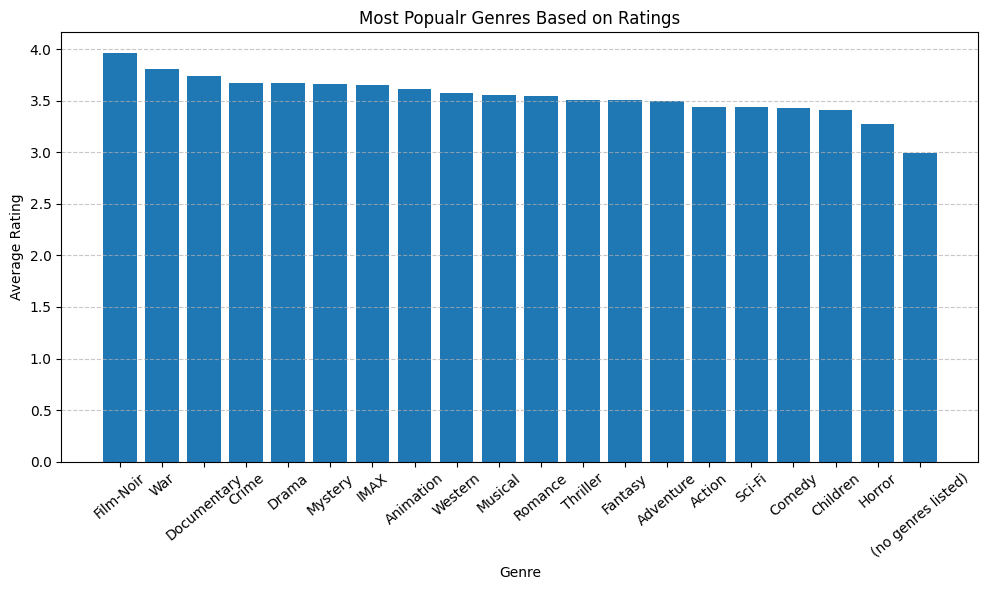

In [20]:
# Create an bar graph
plt.figure(figsize=(10, 5))
plt.bar(genre_rating['genre'], genre_rating['avg_rating'])
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.title('Most Popular Genres Based on Ratings')
plt.xticks(rotation=40)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**2.3 Most Frequent Occuring Tags For Movies**

In [28]:
# Find the most frequent occuring tags
tags_frequency = tag['tag'].value_counts().head(10)
tags_frequency

tag
sci-fi              3576
based on a book     3307
atmospheric         3169
comedy              3078
action              3068
nudity (topless)    2646
surreal             2528
twist ending        2367
bd-r                2334
funny               2253
Name: count, dtype: int64

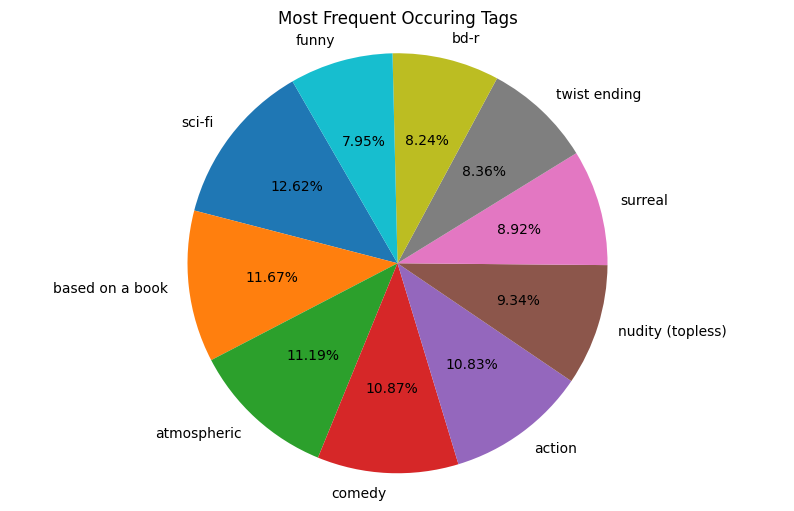

In [22]:
# Create a pie chart
plt.figure(figsize=(10, 6))
plt.pie(tags_frequency.values, labels=tags_frequency.index, autopct='%1.1f%%', startangle=120)
plt.title('Most Frequent Occuring Tags')
plt.axis('equal') 
plt.show()

**2.4: Top Genome Tags Based On Relevance Scores**

In [23]:
# Find the top genome tag based on relevance
genome_scores = score.groupby('tagId')['relevance'].mean().sort_values(ascending=False).head(10)
genome_tags = pd.merge(genome_scores, gtags, on='tagId', how='left')
genome_tags

,tagId,relevance,tag
0,742,0.730527,original
1,646,0.530233,mentor
2,468,0.499534,great ending
3,302,0.490878,dialogue
4,452,0.455614,good soundtrack
5,188,0.450997,catastrophe
6,972,0.448479,storytelling
7,971,0.427058,story
8,464,0.426717,great
9,445,0.424800,good


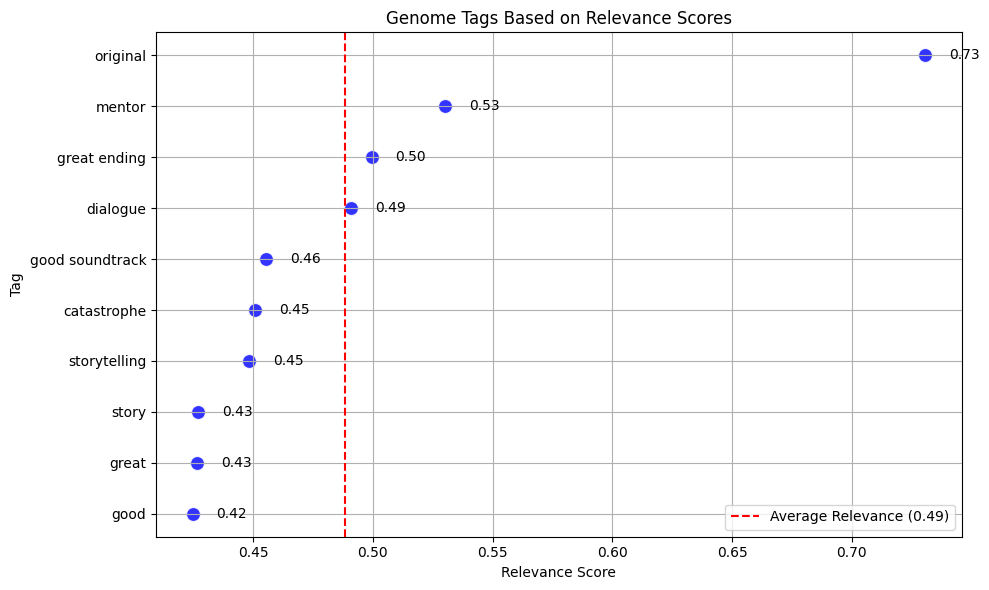

In [24]:
# Create an scatter plot
plt.figure(figsize=(10, 6)) 
sns.scatterplot(x='relevance', y='tag', data=genome_tags, s=90, color='blue', alpha=0.8)

# Add annotations for each data point
for index, row in genome_tags.iterrows():
    plt.text(row['relevance'] + 0.01, row.name, f'{row["relevance"]:.2f}', 
             va='center', fontsize=11, color='black')

# Add a reference line for the score
relevance_scores = genome_tags['relevance'].mean()
plt.axvline(x=relevance_scores, color='red', linestyle='--', label=f'Average Relevance ({relevance_scores:.2f})')

plt.xlabel('Relevance Score')
plt.ylabel('Tag')
plt.title('Genome Tags Based on Relevance Scores')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

**2.5 Most Popular Movie Per Year Based on Average Rating**

In [26]:
# Calculate average rating per movie
movie_data= rating.groupby('movieId').agg({'rating': ['mean', 'count']}).reset_index()
movie_data.columns = ['movieId', 'mean_rating', 'rating_number']

# Filter movie and merge movie titles
best_movies = movie_data[movie_data['rating_number'] >= 100]
best_movies = pd.merge(best_movies, movie, on='movieId')

# Filter movies released from 2000 to 2015 and sort it in descending order
filtered_movies = best_movies[(best_movies['year'].astype(int) >= 2000) & (best_movies['year'].astype(int) <= 2015)]
best_movies = filtered_movies.sort_values(['year', 'mean_rating'], ascending=[False, False])

# Find the index of the top rated movie per year
idx = best_movies.groupby('year')['mean_rating'].idxmax()
top_movies_per_year = best_movies.loc[idx]

# Display the top rated movies titles
top_movies_per_year[['year', 'title', 'mean_rating', 'rating_number', 'genres']]

,year,title,mean_rating,rating_number,genres
3490,2000,Memento,4.178547,30443,Mystery|Thriller
5519,2001,Band of Brothers,4.263182,4305,Action|Drama|War
4681,2002,City of God (Cidade de Deus),4.235410,12937,Action|Adventure|Crime|Drama|Thriller
5351,2003,"Lord of the Rings: The Return of the King, The",4.142382,31577,Action|Adventure|Drama|Fantasy
5463,2004,Eternal Sunshine of the Spotless Mind,4.105628,22352,Drama|Romance|Sci-Fi
6491,2005,Serenity,3.993261,7716,Action|Adventure|Sci-Fi
6695,2006,"Lives of Others, The (Das leben der Anderen)",4.234790,5720,Drama|Romance|Thriller
8056,2007,Louis C.K.: Shameless,4.083614,891,Comedy
7253,2008,"Dark Knight, The",4.220129,20438,Action|Crime|Drama|IMAX
7648,2009,"Secret in Their Eyes, The (El secreto de sus o...",4.046599,1191,Crime|Drama|Mystery|Romance|Thriller


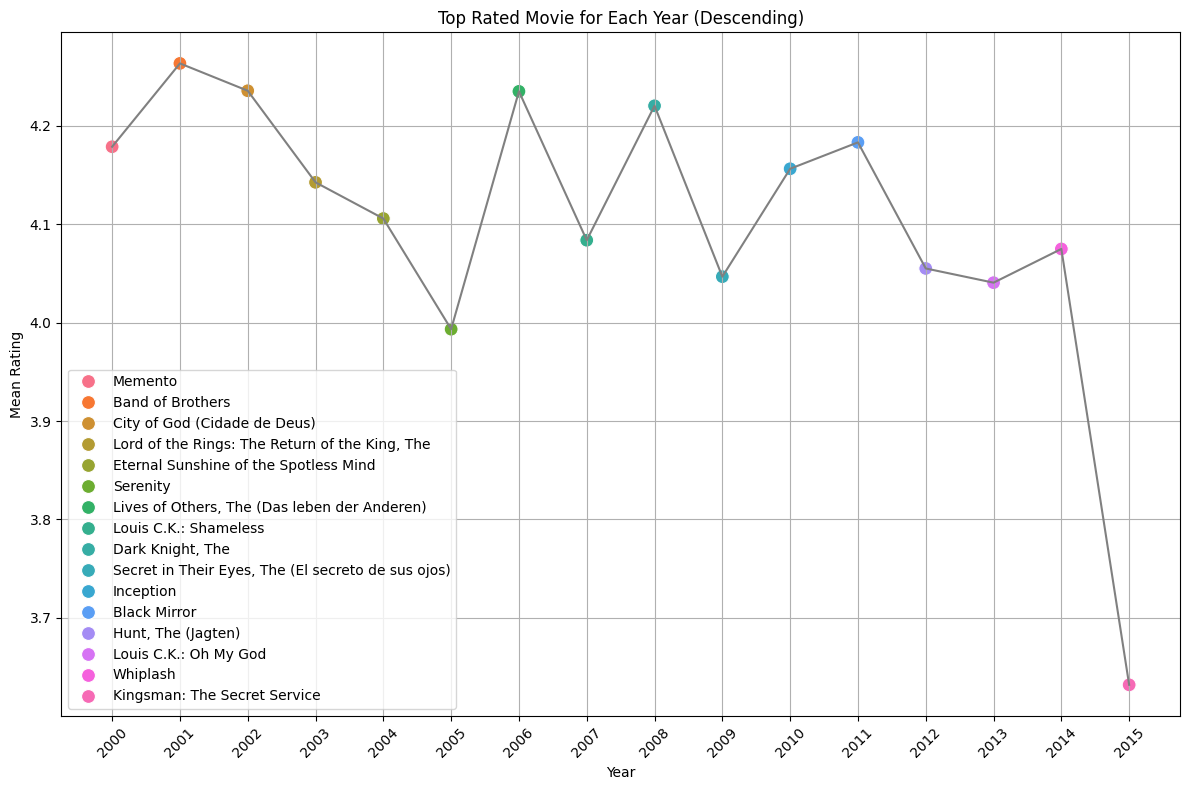

In [ ]:
# Create a scatterplot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='year', y='mean_rating', hue='title', data=top_movies_per_year, s=90, legend='full')
sns.lineplot(x='year', y='mean_rating', data=top_movies_per_year, sort=True, color='grey')
plt.title('Most Popular Movie Per Year')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.xticks(rotation=40)
plt.tight_layout()
plt.grid(True)
plt.show()